# 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [8]:
text = '건설회사 우발부채는 중요한 정보임에도 현재 건설회사 주석 공시로는 정보이용자들에게 필요한 사항을 확인하기 어렵다.'
tokens = [x for x in text.split(' ')]
unique = list(set(tokens))

token2index = {}
for i in range(len(unique)):
    token2index[unique[i]] = i
    
encode = [token2index[x] for x in tokens]
encode

[11, 10, 6, 2, 8, 11, 4, 0, 9, 1, 3, 5, 7]

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [9]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'건설회사': 1, '우발부채는': 2, '중요한': 3, '정보임에도': 4, '현재': 5, '주석': 6, '공시로는': 7, '정보이용자들에게': 8, '필요한': 9, '사항을': 10, '확인하기': 11, '어렵다': 12}
[1, 2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 11, 12]


### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [10]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i]-1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)
    
np.array(one_hot)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공

In [11]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [14]:
num_words = 1000   #등장빈도 순위 1000위까지의 단어만 사용(즉, 단어 집합의 크기가 1000)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 2s 0us/step


In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

### 데이터 확인
- 긍정: 1
- 부정: 0

In [18]:
for i in range(3):
    if y_train[i] == 0:
        print('부정 =>', x_train[i])
    else:
        print('긍정 =>', x_train[i])
    print('\n')

긍정 => [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


부정 => [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
max_len = 100
padded_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
padded_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [22]:
print(len(x_train[0]), '=>', len(padded_x_train[0]))

218 => 100


In [23]:
print(len(x_test[0]), '=>', len(padded_x_test[0]))

68 => 100


### 모델 구성

In [24]:
#모델 구성
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Flatten(),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35201 (137.50 KB)
Trainable params: 35201 (137.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 컴파일 및 학습

In [25]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(padded_x_train, y_train,
                    epochs=10, verbose=0,
                    batch_size=32,
                    validation_split=0.2)

### 시각화

In [26]:
import matplotlib.pyplot as plt

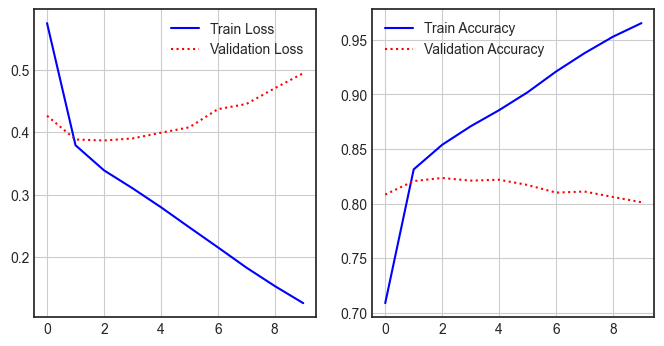

In [28]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

### 모델 평가

In [29]:
model.evaluate(padded_x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4843 - acc: 0.8052


[0.4843273460865021, 0.8051599860191345]

### 단어의 수를 늘린 후 재학습

In [65]:
num_words = 2000
max_len = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

pad_x_train_2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test_2 = pad_sequences(x_test, maxlen=max_len, padding='pre')

데이터 확인

In [66]:
print(x_train[0])
print(pad_x_train_2[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [67]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76801 (300.00 KB)
Trainable params: 76801 (300.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [71]:
history2 = model.fit(pad_x_train_2, y_train,
                    epochs=10, verbose=0,
                    batch_size=32,
                    validation_split=0.2)

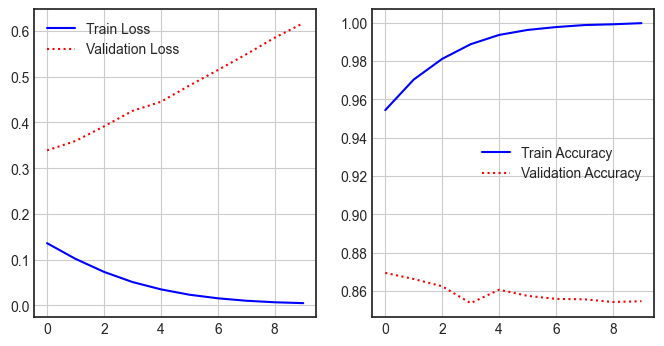

In [72]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'], 'b-', label='Train Loss')
plt.plot(history2.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history2.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history2.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

In [30]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2,
                          remove=('headers', 'footers', 'quotes'))
docs = data.data
print(len(docs))

11314


In [31]:
docs[0]

"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

## 전처리

In [32]:
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
def clean_text(d):     #알파벳과 공백문자가 아닌 텍스트 삭제
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

In [34]:
def clean_stopword(d):
    stop_words = stopwords.words('english')
    result = ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w)>3])
    return result

In [35]:
def tokenize(d):   #빈칸 기준으로 단어를 나누는 토큰화
    return word_tokenize(d)

In [36]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df))

11314


In [37]:
news_df.replace('', float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))
print(news_df.head(2))

11096
                                             article
0  Something about how Koresh had threatened to c...
1  I have an Okidata 2410 printer for which I wou...


In [38]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
print(news_df.head(2))

                                             article
0  something koresh threatened cause local proble...
1  okidata printer would like printer driver anyo...


In [41]:
news_df.loc[0][0]

'something koresh threatened cause local problems wepaons alleged someone else post details soon sure news sniper injures outside buildling arrestedsuspect disgruntled employee universal studios division question californians guns reginald denny trial'

In [42]:
tokenized_df = news_df['article'].apply(tokenize)
tokenized_list = tokenized_df.to_list()

len(tokenized_list[0])

31

In [53]:
import numpy as np

drop_news = [i for i, sentence in enumerate(tokenized_list) if len(sentence)<=1]
news_text = np.delete(np.array(tokenized_list, dtype=object), drop_news, axis=0)

print(len(news_text))

10939


In [78]:
news_text

array([list(['something', 'koresh', 'threatened', 'cause', 'local', 'problems', 'wepaons', 'alleged', 'someone', 'else', 'post', 'details', 'soon', 'sure', 'news', 'sniper', 'injures', 'outside', 'buildling', 'arrestedsuspect', 'disgruntled', 'employee', 'universal', 'studios', 'division', 'question', 'californians', 'guns', 'reginald', 'denny', 'trial']),
       list(['okidata', 'printer', 'would', 'like', 'printer', 'driver', 'anyone', 'seen', 'thing', 'microsoft', 'print', 'windows', 'fonts', 'available', 'paradox', 'windows', 'cant', 'print', 'labels', 'unless', 'proper', 'printer', 'defined', 'thanks', 'bryan', 'ward', 'survey', 'research', 'center', 'university', 'utah']),
       list(['replaced', 'motherboard', 'system', 'similar', 'questions', 'cents', 'worth', 'speaker', 'connector', 'wires', 'going', 'speaker', 'speaker', 'coil', 'bidirectional', 'makes', 'difference', 'attach', 'turbo', 'switch', 'three', 'wires', 'control', 'want', 'turbo', 'become', 'active', 'switch', 'pu

## Gensim을 이용한 Word2Vec

### CBOW

In [74]:
from gensim.models import Word2Vec

In [75]:
model = Word2Vec(sentences=news_text, 
                 window=3,     #Maximum distance between the current and predicted word within a sentence
                 vector_size=100,     #Dimensionality of the word vectors
                 min_count=5,  #Ignores all words with total frequency lower than this
                 workers=4,    #Use these many worker threads to train the model (=faster training with multicore machines).
                 sg=0)         #1 for skip-gram; otherwise CBOW.

In [76]:
model.wv.most_similar(positive=['soldiers'])

[('turks', 0.9933054447174072),
 ('turkey', 0.9922646880149841),
 ('genocide', 0.988389253616333),
 ('armenia', 0.9883098602294922),
 ('villages', 0.9803398251533508),
 ('azeri', 0.9786325693130493),
 ('muslim', 0.9780528545379639),
 ('kurds', 0.9731791615486145),
 ('land', 0.971405565738678),
 ('army', 0.9691545963287354)]

In [103]:
model.wv.most_similar(positive=['soldiers'], negative=['religion'])

[('period', 0.7274631261825562),
 ('pittsburgh', 0.7246679663658142),
 ('north', 0.700224757194519),
 ('third', 0.6881362199783325),
 ('narimanov', 0.6868058443069458),
 ('philadelphia', 0.6861504316329956),
 ('division', 0.6753809452056885),
 ('chicago', 0.6750305891036987),
 ('maxaxaxaxaxaxaxaxaxaxaxaxaxax', 0.6715219616889954),
 ('louis', 0.6641533970832825)]

### Skip-gram

In [104]:
model = Word2Vec(sentences=news_text, 
                 window=3, 
                 vector_size=100,    
                 min_count=5, 
                 workers=4, 
                 sg=1)    #1 for skip-gram; otherwise CBOW.

In [105]:
model.wv.most_similar(positive=['soldiers'])

[('azeri', 0.942372739315033),
 ('troops', 0.9346334934234619),
 ('wounded', 0.9336643815040588),
 ('murdered', 0.9310632348060608),
 ('massacre', 0.9282963275909424),
 ('refugees', 0.9277260899543762),
 ('karabakh', 0.9257349967956543),
 ('attacked', 0.9215260744094849),
 ('burned', 0.915864109992981),
 ('girls', 0.9152511358261108)]

In [106]:
model.wv.most_similar(positive=['soldiers'], negative=['religion'])

[('door', 0.49724841117858887),
 ('went', 0.4942329227924347),
 ('fired', 0.4901769757270813),
 ('burned', 0.48500925302505493),
 ('eight', 0.48417598009109497),
 ('baku', 0.4797894060611725),
 ('puck', 0.477811723947525),
 ('floor', 0.47515615820884705),
 ('dineen', 0.46862924098968506),
 ('broke', 0.4609653353691101)]

### 임베딩 벡터 시각화

In [107]:
from gensim.models import KeyedVectors

#metadata.tsv와 tensor.tsv 데이터 생성
model.wv.save_word2vec_format('news_w2v')  
#Store the input-hidden weight matrix in the same format used by the original C word2vec-tool, for compatibility.

* metadata.tsv와 tensor.tsv 데이터 생성

In [108]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

C:\Users\master\anaconda3\envs\py38\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
2024-01-03 18:25:42,796 - word2vec2tensor - INFO - running C:\Users\master\anaconda3\envs\py38\lib\site-packages\gensim\scripts\word2vec2tensor.py -i news_w2v -o news_w2v
2024-01-03 18:25:42,796 - keyedvectors - INFO - loading projection weights from news_w2v
2024-01-03 18:25:43,860 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (16996, 100) matrix of type float32 from news_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-03T18:25:43.860572', 'gensim': '4.3.2', 'python': '3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}
2024-01-03 18:25:44,956 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2024-01-03 18:25:44,956 - word2vec2tensor - INFO - Tensor metadata file saved to 

* Embedding Projector: https://projector.tensorflow.org/

## Keras를 이용한 Word2Vec, Skipgram, CBOW 구현

출처: https://github.com/yeon93/NLP_study/blob/main/07_embedding.ipynb

In [109]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2, remove=('headers', 'footers', 'quotes'))
docs = data.data

print(len(docs))
docs[0]          #이메일주소, 개행문자, 숫자 전처리 필요

11314


"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

In [110]:
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')

def clean_text(d): 
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 3])

def tokenize(d):
    return word_tokenize(d)

In [111]:

import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df)) 

news_df.replace('', float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df.tail(3)  #index가 맞지 않음

11314
11096


,article
11311,stop hold problems official history says first...
11312,right also forgot cant barring nobody base fra...
11313,hmmm lets could upload files around color ones...


In [112]:
news_df = news_df.reset_index()
del news_df['index']
news_df.tail(3)

,article
11093,stop hold problems official history says first...
11094,right also forgot cant barring nobody base fra...
11095,hmmm lets could upload files around color ones...


In [113]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news =tokenized_news.to_list()

In [115]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1] 
news_texts = np.delete(np.array(tokenized_news, dtype='object'), drop_news, axis = 0)                               
print(len(news_texts)) 

10939


In [116]:
# 단어 사전 만들기
from tensorflow.keras.preprocessing.text import Tokenizer

news_2000 = news_texts[:2000]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

idx2word = {value:key for key, value in tokenizer.word_index.items()}
sequences = tokenizer.texts_to_sequences(news_2000)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) 

27778


### 2. Skipgram

전처리에서 Negative Sampling
- Word2Vec은 출력층이 내놓는 값에 소프트맥스 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파
- 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp 계산을 하는데 전체 단어가 많을 경우 엄청난 계산량 발생  
- 네거티브 샘플링은 소프트맥스 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산을 하는 방식
- 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative sample)를 5~20개 정도 뽑고,
      
이를 정답단어와 합쳐 전체 단어처럼 소프트맥스 확률을 계산하여 파라미터 업데이트터 업데이트

In [117]:
from tensorflow.keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in sequences[:10]] # 10개 단어 샘플
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("{:s}({:d}), {:s}({:d}) -> {:d}".format(idx2word[pairs[i][0]], pairs[i][0],
                                                  idx2word[pairs[i][1]], pairs[i][1],
                                                  labels[i]))
    
print(len(skip_grams), len(pairs), len(labels)) 

sure(59), intervention(2251) -> 0
sniper(5528), someone(90) -> 1
denny(12038), fennelly(20975) -> 0
disgruntled(12034), allnatural(19524) -> 0
sniper(5528), problems(173) -> 1
10 1020 1020


In [118]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot

embed_size = 50

def word2vec():
    target_inputs = Input(shape=(1,), dtype='int32')
    target_embedding = Embedding(vocab_size, embed_size)(target_inputs)
    
    context_inputs = Input(shape=(1,), dtype='int32')
    context_embedding = Embedding(vocab_size, embed_size)(context_inputs)
    
    dot_product = Dot(axes=2)([target_embedding, context_embedding])
    dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
    output = Activation('sigmoid')(dot_product)
    
    model = Model(inputs=[target_inputs, context_inputs], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

model = word2vec()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 50)                1388900   ['input_1[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 50)                1388900   ['input_2[0][0]']             
                                                                                              

In [138]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [122]:
for epoch in range(1,11):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem] 
        Y = labels 
        loss += model.train_on_batch(X,Y) # 한번의 epoch에 여러 번 트레이닝
        
    print('Epoch : ', epoch, 'Loss : ', loss)

Epoch :  1 Loss :  6.931315124034882
Epoch :  2 Loss :  6.918683350086212
Epoch :  3 Loss :  6.905581295490265
Epoch :  4 Loss :  6.889990389347076
Epoch :  5 Loss :  6.87067848443985
Epoch :  6 Loss :  6.846556663513184
Epoch :  7 Loss :  6.8166502714157104
Epoch :  8 Loss :  6.780100405216217
Epoch :  9 Loss :  6.736171841621399
Epoch :  10 Loss :  6.684262454509735


In [125]:
import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))
f.close()

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary=False)

In [126]:
skipgram.most_similar(positive=['soldiers'])

[('reasonably', 0.5941402316093445),
 ('usefulness', 0.5150818228721619),
 ('releasing', 0.5126029849052429),
 ('immortal', 0.4909834563732147),
 ('gilbert', 0.48984843492507935),
 ('increases', 0.48973482847213745),
 ('immigrants', 0.48925769329071045),
 ('clinics', 0.48829832673072815),
 ('xworld', 0.4878932535648346),
 ('configsys', 0.4858366549015045)]

In [127]:
skipgram.most_similar(positive=['economy'])

[('yelena', 0.5451171398162842),
 ('typecard', 0.5326345562934875),
 ('scoenfeld', 0.4960656762123108),
 ('cops', 0.49454015493392944),
 ('thereby', 0.491227924823761),
 ('counts', 0.48213478922843933),
 ('strictly', 0.48065340518951416),
 ('theckelcolhpcom', 0.48049452900886536),
 ('descfb', 0.47270599007606506),
 ('cijf', 0.4636850953102112)]

### 3. CBOW

In [128]:
def skipgram2cbow(skipgrams):
    cbows = []
    flag = 0
    for n in skip_grams:
        temp1 = []
        for t in n :
            if flag == 0:
                temp1.append(t)
            else:
                flag = 1
                temp2 = []
                for x in t:
                    temp2.append([x[1], x[0]])
                temp1.append(temp2)
        cbows.append(temp1)
    return cbows

cbows = skipgram2cbow(skip_grams)
pairs, labels = cbows[0][0], cbows[0][1]
for i in range(5):
    print('{:s}({:d}), {:s}({:d}) -> {:d}'.format(
    idx2word[pairs[i][0]], pairs[i][0],
    idx2word[pairs[i][1]], pairs[i][1],
    labels[i]))
    
print(len(cbows), len(pairs), len(labels)) 

sure(59), intervention(2251) -> 0
sniper(5528), someone(90) -> 1
denny(12038), fennelly(20975) -> 0
disgruntled(12034), allnatural(19524) -> 0
sniper(5528), problems(173) -> 1
10 1020 1020


In [129]:
model = word2vec()

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 50)                1388900   ['input_3[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 50)                1388900   ['input_4[0][0]']             
                                                                                            

In [130]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [131]:
for epoch in range(1,11):
    loss = 0
    for _, elem in enumerate(cbows):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem] 
        Y = labels 
        loss += model.train_on_batch(X,Y) # 한번의 epoch에 여러 번 트레이닝
        
    print('Epoch : ', epoch, 'Loss : ', loss)

Epoch :  1 Loss :  6.931632816791534
Epoch :  2 Loss :  6.919125556945801
Epoch :  3 Loss :  6.906222105026245
Epoch :  4 Loss :  6.890934109687805
Epoch :  5 Loss :  6.8720263838768005
Epoch :  6 Loss :  6.8484110832214355
Epoch :  7 Loss :  6.81912624835968
Epoch :  8 Loss :  6.783328473567963
Epoch :  9 Loss :  6.740298688411713
Epoch :  10 Loss :  6.689449727535248


In [132]:

f = open('cbow.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))
f.close()

cbow = gensim.models.KeyedVectors.load_word2vec_format('cbow.txt', binary=False)

In [133]:
cbow.most_similar(positive=['soldiers'])

[('composite', 0.5777616500854492),
 ('powerful', 0.5025898814201355),
 ('frankdsuucp', 0.4928368926048279),
 ('brand', 0.4767518937587738),
 ('governmental', 0.4597456455230713),
 ('accented', 0.45884761214256287),
 ('width', 0.45761093497276306),
 ('bettadpur', 0.45221906900405884),
 ('ethics', 0.44797593355178833),
 ('conspiracy', 0.44453802704811096)]

In [135]:
cbow.most_similar(['economy'])

[('contacted', 0.5539079308509827),
 ('moteccinfotroff', 0.5328188538551331),
 ('glassresin', 0.5064695477485657),
 ('qualifies', 0.4954788386821747),
 ('underlies', 0.49406665563583374),
 ('tipped', 0.49167078733444214),
 ('gazbhxhfhba', 0.4858366847038269),
 ('undertake', 0.4792623817920685),
 ('historians', 0.4726984202861786),
 ('less', 0.4620119035243988)]